# Taxi predction

## 1. Business Understanding

In [1]:
# Business Understanding: qual será a saída, a pergunta a ser respondida: qual é o tempo da previsão do taxi

### Este modelo tem como objetivo prever o tempo total de uma corrida de taxi na cidade de Nova York. Para isto, foi utilizada uma base de dados disponibilizada pela NYC Taxi and Limousine Commission.
### Desenvolvido por Bruno Sousa
<p>asdhashdasdjaf ajdfh ajdsfh ajfdha df </p>

## 2. Data Understanding

In [3]:
# Data manipuation
import pandas as pd
import numpy as np

# Visualizing
import matplotlib.pyplot as plt

# Model selection and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split

In [6]:
# RMSE, MSE, MAE > entender (lá pra frente)
# Se não estiver separado, vc utiliza o sklearn.preprocessing pra fazer o train_test_split(train=0.7)

In [5]:
df_train = pd.read_csv('train.csv')

PermissionError: [Errno 13] Permission denied

In [1]:
X = df_train[['vendor_id',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude']]

y = df_train['trip_duration']

NameError: name 'df_train' is not defined

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Explicação do tipo de variável vendor_id

<AxesSubplot:>

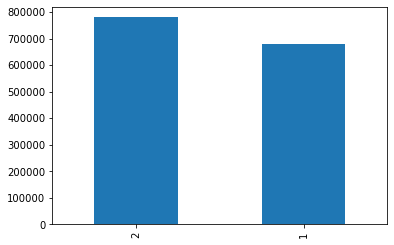

In [11]:
df_train.vendor_id.value_counts().plot.bar()

In [16]:
#df_train['passenger count'].value_counts().plot.bar()  ==== caso o nome da coluna estiver com espaço

<AxesSubplot:>

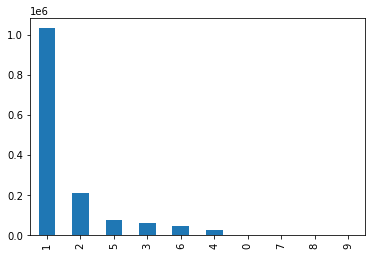

In [17]:
df_train['passenger_count'].value_counts().plot.bar()

In [24]:
df_train['store_and_fwd_flag'].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

In [21]:
df_train[df_train['store_and_fwd_flag'] == "N"].trip_duration.mean()

958.8197055147563

In [22]:
df_train[df_train['store_and_fwd_flag'] == "Y"].trip_duration.mean()

1080.763331261653

<AxesSubplot:>

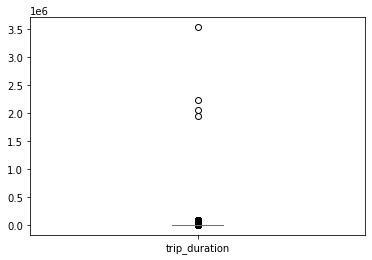

In [31]:
df_train.trip_duration.plot.box()

In [32]:
df_train.trip_duration.describe()

count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

In [38]:
len(df_train[df_train.trip_duration > 1000000])

4

In [39]:
df_train[df_train.trip_duration > 1000000]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
355003,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,1939736
680594,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,2049578
924150,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,2227612
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282


## 3. Data preparation

In [57]:
# Tratar dados categóricos

In [ ]:
# uma posssibilidade para melhorar o resultado da previsão , é fazer um agrupamento dos passageiros em 2 classes:
# mais de dois passageiros, menos ou igual a 2 passageiros 

In [ ]:
# Remover o Y do store_and_fwd_flag

In [ ]:
# pickup_datetime pode virar uma variável categórica: manhã, tarde, noite, madrugada

## 4. Modeling

In [59]:
model = LinearRegression()

In [83]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Carregar base de teste, e fazer previsão com o modelo já treinado

In [85]:
y_predicted = model.predict(X_test)

In [88]:
y_predicted

array([1045.43342833,  944.42896788, 1148.01333825, ...,  779.55124136,
       1089.6153012 ,  876.23926488])

## 5. Evaluation

In [90]:
mae(y_predicted, y_test)

611.7178293968587